In [320]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler

In [321]:
cd G:\My Drive\Colab Notebooks\DAV Assessment\Cefas_smartbuoy

G:\My Drive\Colab Notebooks\DAV Assessment\Cefas_smartbuoy


In [322]:
df = pd.read_csv('clean_ext_data.csv', parse_dates = ['dateTime'])
df = df.set_index('dateTime')
df = df.drop('kd', axis = 1)
df = df.dropna()

phase_0 = df.loc[df['phase'] == 0, :].copy()
X = phase_0.drop(['fluors', 'phase'], axis = 1).copy()
y = phase_0['fluors'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# standardize the data
scaler = StandardScaler()
# train the scaler on the training data
X_train = scaler.fit_transform(X_train)
# apply the scaler to the test data sets
X_test = scaler.transform(X_test)
X = scaler.transform(X)

In [323]:
def lr_scheduler(epoch, lr):
    if epoch in [10*n for n in range(1,12)]:
        lr = lr*0.9
        return lr
    elif epoch in [10*n for n in range(12,20)]:
        lr = lr*0.5
        return lr
    return lr
callbacks = [LearningRateScheduler(lr_scheduler, verbose = 0)]

model = Sequential()
model.add(Dense(units = 200, activation = "relu", input_shape = (4, )))
model.add(Dropout(0.1))
model.add(Dense(units = 450, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 200, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 100, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 800, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation = "relu"))
#model.summary()

optimiser = keras.optimizers.Adam(learning_rate = 0.0002)
model.compile(loss = 'mean_squared_error', optimizer = optimiser)
no_epochs = 180
history = model.fit(X_train, y_train, batch_size = 250, callbacks = callbacks, epochs = no_epochs, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/180
104/104 [==============================] - 6s 36ms/step - loss: 3.2948 - val_loss: 2.8471 - lr: 2.0000e-04
Epoch 2/180
104/104 [==============================] - 3s 29ms/step - loss: 2.7084 - val_loss: 2.6601 - lr: 2.0000e-04
Epoch 3/180
104/104 [==============================] - 3s 30ms/step - loss: 2.5979 - val_loss: 2.5373 - lr: 2.0000e-04
Epoch 4/180
104/104 [==============================] - 3s 29ms/step - loss: 2.5262 - val_loss: 2.4288 - lr: 2.0000e-04
Epoch 5/180
104/104 [==============================] - 3s 30ms/step - loss: 2.4102 - val_loss: 2.4069 - lr: 2.0000e-04
Epoch 6/180
104/104 [==============================] - 3s 29ms/step - loss: 2.3787 - val_loss: 2.2704 - lr: 2.0000e-04
Epoch 7/180
104/104 [==============================] - 3s 29ms/step - loss: 2.3141 - val_loss: 2.1771 - lr: 2.0000e-04
Epoch 8/180
104/104 [==============================] - 3s 29ms/step - loss: 2.2393 - val_loss: 2.1096 - lr: 2.0000e-04
Epoch 9/180
104/104 [===========================

C:\Users\Reuben\AppData\Local\Temp\ipykernel_2240\1087051410.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


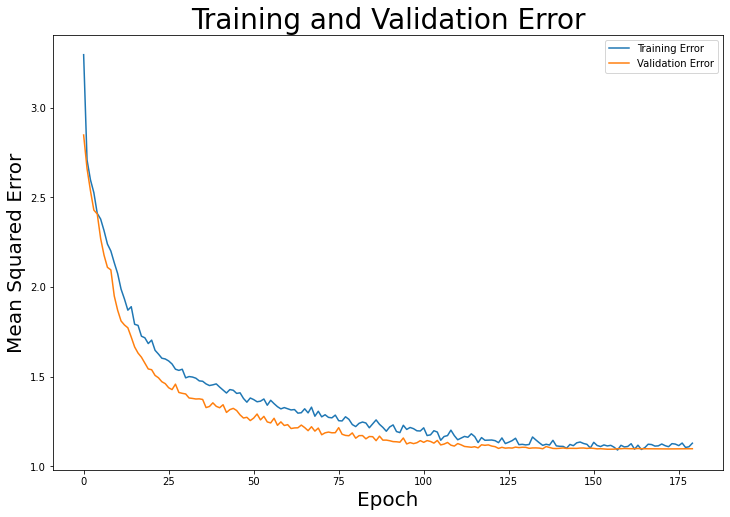

In [324]:
epochs_range = range(no_epochs)
train_err = history.history['loss']
validation_err = history.history['val_loss']

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(epochs_range, train_err, label = 'Training Error')
ax.plot(epochs_range, validation_err, label = 'Validation Error')
ax.legend(loc = 'upper right')
ax.set_xlabel('Epoch', fontsize = 20)
ax.set_ylabel('Mean Squared Error', fontsize = 20)
ax.set_title('Training and Validation Error', fontsize = 28)
fig.show()

In [325]:
pred_train = model.predict(X_train)
print(f'{mean_squared_error(y_train, pred_train):.2f}')
pred_test = model.predict(X_test)
print(f'{mean_squared_error(y_test, pred_test):.2f}')

806/806 [==============================] - 3s 3ms/step
0.96
538/538 [==============================] - 2s 3ms/step
1.10


In [331]:
model.save('final_model.h5')

In [327]:
#model = keras.models.load_model('model.h5')
pred_train = model.predict(X_train)
print(f'{mean_squared_error(y_train, pred_train):.2f}')
pred_test = model.predict(X_test)
print(f'{mean_squared_error(y_test, pred_test):.2f}')
y_pred = model.predict(X)
print(f'{mean_squared_error(y, y_pred):.2f}')

806/806 [==============================] - 2s 3ms/step
0.96
538/538 [==============================] - 2s 3ms/step
1.10
1343/1343 [==============================] - 4s 3ms/step
1.01


C:\Users\Reuben\AppData\Local\Temp\ipykernel_2240\1006791677.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


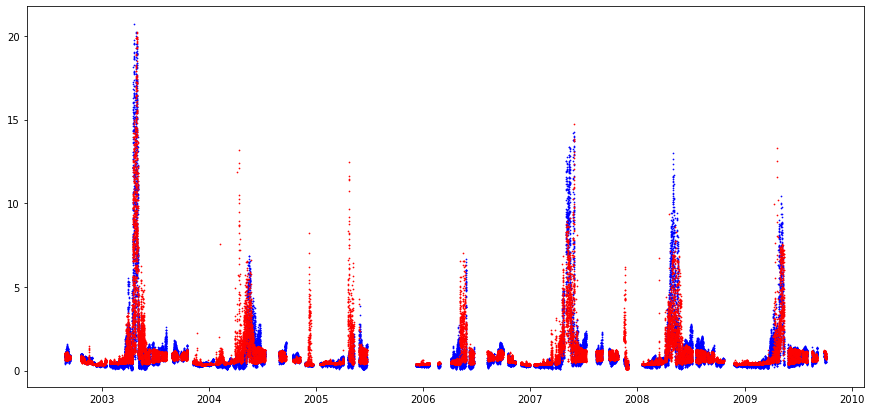

In [328]:
phase_0.loc[:, 'y_pred'] = y_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(phase_0.index, phase_0['fluors'], s = 0.5, color = 'blue')
ax.scatter(phase_0.index, phase_0['y_pred'], s = 0.5, color = 'red')
#fig.savefig('predictions.png')
fig.show()

#phase_0.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_0_predictions.csv', index = 'false', sep = ',')

In [329]:
phase_1 = df.loc[df['phase'] > 0, :].copy()
X_1 = phase_1.drop(['fluors', 'phase'], axis = 1).copy()
y_1 = phase_1.loc[:, 'fluors'].copy()
scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)
y_1_pred = model.predict(X_1)
print(f'{mean_squared_error(y_1, y_1_pred):.2f}')
#phase_1.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_1_predictions.csv', index = 'false', sep = ',')

1904/1904 [==============================] - 7s 3ms/step
2.53


C:\Users\Reuben\AppData\Local\Temp\ipykernel_2240\2978685884.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


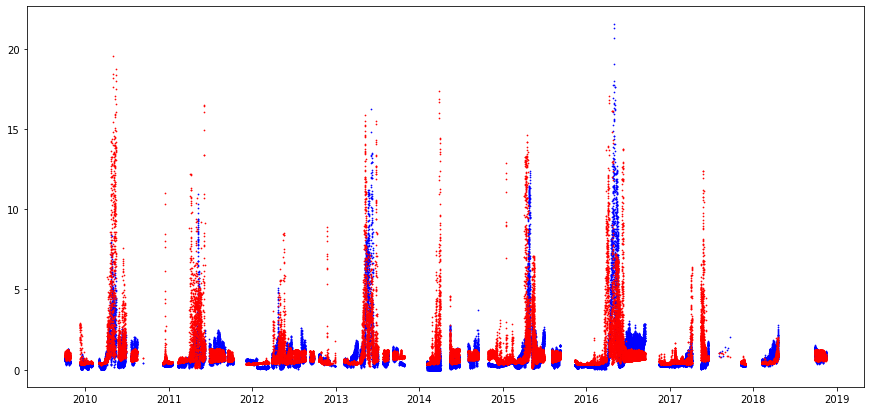

In [330]:
phase_1['y_1_pred'] = y_1_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(phase_1.index, phase_1['fluors'], s = 0.5, color = 'blue')
ax.scatter(phase_1.index, phase_1['y_1_pred'], s = 0.5, color = 'red')
#fig.savefig('future_predictions.png')
fig.show()